<a href="https://colab.research.google.com/github/AnweshaC21/Air-pollution-analysis-and-the-effect-of-Covid/blob/main/Correlation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Covid Pollutants Analysis/Jahangirpuri.csv', parse_dates=[0])
df

,Date,PM2.5,PM10,NO2,CO,Ozone
0,2019-01-01,407.94,581.72,100.93,2.98,20.38
1,2019-02-01,465.07,631.64,116.32,3.66,20.94
2,2019-03-01,437.71,605.65,91.10,3.13,19.11
3,2019-04-01,313.42,510.71,72.73,3.07,10.20
4,2019-05-01,295.88,502.12,78.75,3.10,21.11
...,...,...,...,...,...,...
360,2019-12-27,294.96,432.33,172.03,1.64,3.08
361,2019-12-28,323.97,482.62,149.93,2.07,3.84
362,2019-12-29,375.00,523.11,181.87,2.05,3.30
363,2019-12-30,384.73,537.33,183.00,2.43,3.28


# **Pearson Correlation**

###Correlation among Pollutants

In [ ]:
from scipy.stats import pearsonr

In [ ]:
for i in df.columns.tolist()[1:]:
  for j in df.columns.tolist()[1:]:
    if i!=j:
      corr, _ = pearsonr(df[i],df[j])
      print('%s & %s: %.3f\n' % (i, j, corr), end='')

PM2.5 & PM10: 0.931
PM2.5 & NO2: 0.715
PM2.5 & CO: 0.774
PM2.5 & Ozone: -0.314
PM10 & PM2.5: 0.931
PM10 & NO2: 0.630
PM10 & CO: 0.797
PM10 & Ozone: -0.127
NO2 & PM2.5: 0.715
NO2 & PM10: 0.630
NO2 & CO: 0.460
NO2 & Ozone: -0.348
CO & PM2.5: 0.774
CO & PM10: 0.797
CO & NO2: 0.460
CO & Ozone: -0.125
Ozone & PM2.5: -0.314
Ozone & PM10: -0.127
Ozone & NO2: -0.348
Ozone & CO: -0.125


In [ ]:
cormat = df.corr()
round(cormat,2)

,PM2.5,PM10,NO2,CO,Ozone
PM2.5,1.00,0.93,0.71,0.77,-0.31
PM10,0.93,1.00,0.63,0.80,-0.13
NO2,0.71,0.63,1.00,0.46,-0.35
CO,0.77,0.80,0.46,1.00,-0.12
Ozone,-0.31,-0.13,-0.35,-0.12,1.00


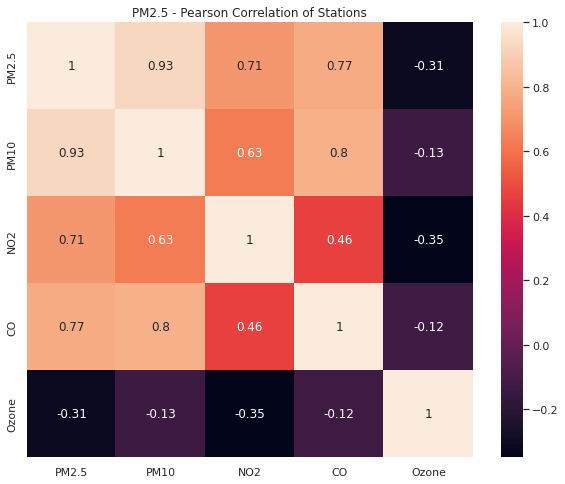

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
plt.title('PM2.5 - Pearson Correlation of Stations')
sns.heatmap(cormat, annot=True)

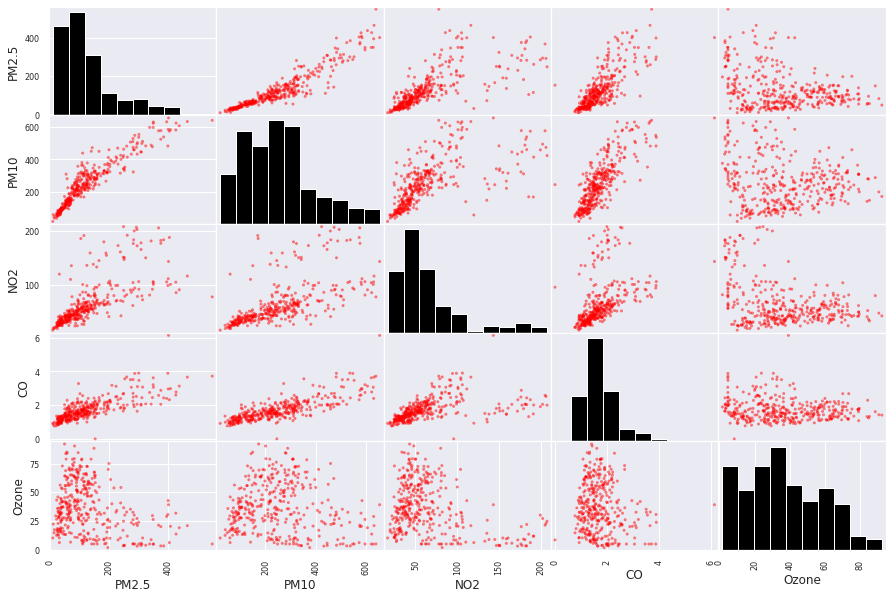

In [ ]:
pd.plotting.scatter_matrix(df, color='red', figsize=(15,10), hist_kwds={'color':['black']})
plt.show()

###Correlation with weather parameters

In [ ]:
#comparing weather parameters

df2 = pd.read_csv('/content/gdrive/MyDrive/Covid Pollutants Analysis/Jahangirpuri_weather.csv', parse_dates=[0])

df['AT'] = df2['AT']
df['RH'] = df2['RH']
df['WS'] = df2['WS']

df

,Date,PM2.5,PM10,NO2,CO,Ozone,AT,RH,WS
0,2019-01-01,407.94,581.72,100.93,2.98,20.38,14.17,66.98,0.30
1,2019-02-01,465.07,631.64,116.32,3.66,20.94,15.09,70.84,0.38
2,2019-03-01,437.71,605.65,91.10,3.13,19.11,14.65,74.92,0.47
3,2019-04-01,313.42,510.71,72.73,3.07,10.20,12.60,82.75,0.44
4,2019-05-01,295.88,502.12,78.75,3.10,21.11,14.42,70.37,0.72
...,...,...,...,...,...,...,...,...,...
360,2019-12-27,294.96,432.33,172.03,1.64,3.08,14.44,65.78,0.29
361,2019-12-28,323.97,482.62,149.93,2.07,3.84,13.01,71.58,0.27
362,2019-12-29,375.00,523.11,181.87,2.05,3.30,7.83,66.82,0.30
363,2019-12-30,384.73,537.33,183.00,2.43,3.28,7.02,78.77,0.50


In [ ]:
cormat = df.corr()
round(cormat,2)

,PM2.5,PM10,NO2,CO,Ozone,AT,RH,WS
PM2.5,1.00,0.93,0.71,0.77,-0.31,-0.60,0.13,-0.32
PM10,0.93,1.00,0.63,0.80,-0.13,-0.42,-0.10,-0.32
NO2,0.71,0.63,1.00,0.46,-0.35,-0.56,0.10,-0.32
CO,0.77,0.80,0.46,1.00,-0.12,-0.39,0.07,-0.31
Ozone,-0.31,-0.13,-0.35,-0.12,1.00,0.56,-0.56,0.10
AT,-0.60,-0.42,-0.56,-0.39,0.56,1.00,-0.55,0.14
RH,0.13,-0.10,0.10,0.07,-0.56,-0.55,1.00,-0.02
WS,-0.32,-0.32,-0.32,-0.31,0.10,0.14,-0.02,1.00


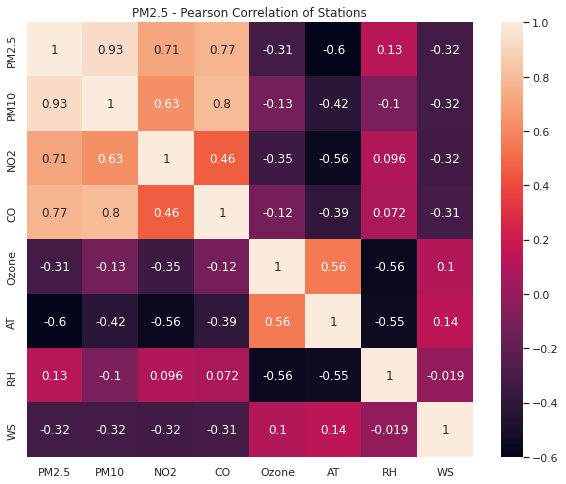

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
plt.title('PM2.5 - Pearson Correlation of Stations')
sns.heatmap(cormat, annot=True)

###Correlation among Stations

In [ ]:
pm25_df = pd.read_csv('/content/gdrive/MyDrive/Covid Pollutants Analysis/PM2.5/2019.csv', parse_dates=[0])
pm25_df.head()

,Date,Alipur,Anand Vihar,Ashok Vihar,Aya Nagar,Bawana,Burari Crossing,CRRI Mathura Road,Dr. Karni Singh Shooting Range,DTU,...,Punjabi Bagh,Pusa,R K Puram,Rohini,Shadipur,Sirifort,Sonia Vihar,Sri Aurobindo Marg,Vivek Vihar,Wazirpur
0,2019-01-01,309.79,380.23,367.28,196.95,151.12,354.97,300.60,220.83,297.60,...,307.49,284.81,309.56,373.61,305.84,262.90,361.54,197.69,319.94,400.88
1,2019-02-01,339.24,418.47,457.14,218.92,257.21,325.68,313.11,234.67,350.33,...,366.88,290.07,376.82,440.58,297.71,314.66,405.96,254.33,357.69,468.81
2,2019-03-01,367.25,412.89,428.69,243.45,141.07,277.09,358.32,287.91,381.28,...,430.99,377.30,327.50,423.61,336.17,338.66,360.71,286.96,367.83,487.06
3,2019-04-01,222.16,291.95,286.43,187.41,222.49,300.31,230.94,227.49,228.88,...,271.26,261.42,286.46,281.08,219.36,252.45,271.92,231.23,279.73,321.00
4,2019-05-01,226.40,241.67,283.47,195.16,309.92,285.77,230.27,228.70,246.89,...,232.85,216.21,289.95,311.50,217.75,254.46,325.86,254.04,283.69,345.69


In [ ]:
pm10_df = pd.read_csv('/content/gdrive/MyDrive/Covid Pollutants Analysis/PM10/2019.csv', parse_dates=[0])
no2_df = pd.read_csv('/content/gdrive/MyDrive/Covid Pollutants Analysis/NO2/2019.csv', parse_dates=[0])
co_df = pd.read_csv('/content/gdrive/MyDrive/Covid Pollutants Analysis/CO/2019.csv', parse_dates=[0])
ozone_df = pd.read_csv('/content/gdrive/MyDrive/Covid Pollutants Analysis/Ozone/2019.csv', parse_dates=[0])

In [ ]:
cormat = pm25_df.corr()
round(cormat,2)

,Alipur,Anand Vihar,Ashok Vihar,Aya Nagar,Bawana,Burari Crossing,CRRI Mathura Road,Dr. Karni Singh Shooting Range,DTU,Dwarka-Sector 8,...,Punjabi Bagh,Pusa,R K Puram,Rohini,Shadipur,Sirifort,Sonia Vihar,Sri Aurobindo Marg,Vivek Vihar,Wazirpur
Alipur,1.00,0.95,0.97,0.92,0.95,0.91,0.94,0.94,0.96,0.92,...,0.97,0.95,0.90,0.89,0.81,0.92,0.94,0.94,0.97,0.96
Anand Vihar,0.95,1.00,0.97,0.91,0.93,0.88,0.95,0.94,0.94,0.92,...,0.96,0.94,0.91,0.88,0.85,0.93,0.94,0.93,0.98,0.97
Ashok Vihar,0.97,0.97,1.00,0.92,0.95,0.90,0.96,0.96,0.97,0.94,...,0.99,0.97,0.94,0.91,0.85,0.95,0.97,0.96,0.98,0.99
Aya Nagar,0.92,0.91,0.92,1.00,0.90,0.85,0.91,0.94,0.91,0.91,...,0.93,0.93,0.85,0.84,0.73,0.91,0.86,0.94,0.93,0.91
Bawana,0.95,0.93,0.95,0.90,1.00,0.89,0.93,0.94,0.95,0.94,...,0.95,0.93,0.90,0.89,0.81,0.92,0.92,0.94,0.94,0.95
Burari Crossing,0.91,0.88,0.90,0.85,0.89,1.00,0.88,0.84,0.88,0.83,...,0.89,0.85,0.84,0.81,0.75,0.83,0.88,0.85,0.89,0.89
CRRI Mathura Road,0.94,0.95,0.96,0.91,0.93,0.88,1.00,0.95,0.94,0.94,...,0.96,0.95,0.93,0.89,0.82,0.94,0.94,0.95,0.96,0.96
Dr. Karni Singh Shooting Range,0.94,0.94,0.96,0.94,0.94,0.84,0.95,1.00,0.95,0.96,...,0.96,0.98,0.92,0.89,0.81,0.97,0.92,0.99,0.96,0.95
DTU,0.96,0.94,0.97,0.91,0.95,0.88,0.94,0.95,1.00,0.94,...,0.96,0.96,0.90,0.91,0.79,0.93,0.93,0.95,0.95,0.96
Dwarka-Sector 8,0.92,0.92,0.94,0.91,0.94,0.83,0.94,0.96,0.94,1.00,...,0.95,0.96,0.89,0.88,0.79,0.94,0.89,0.96,0.94,0.93


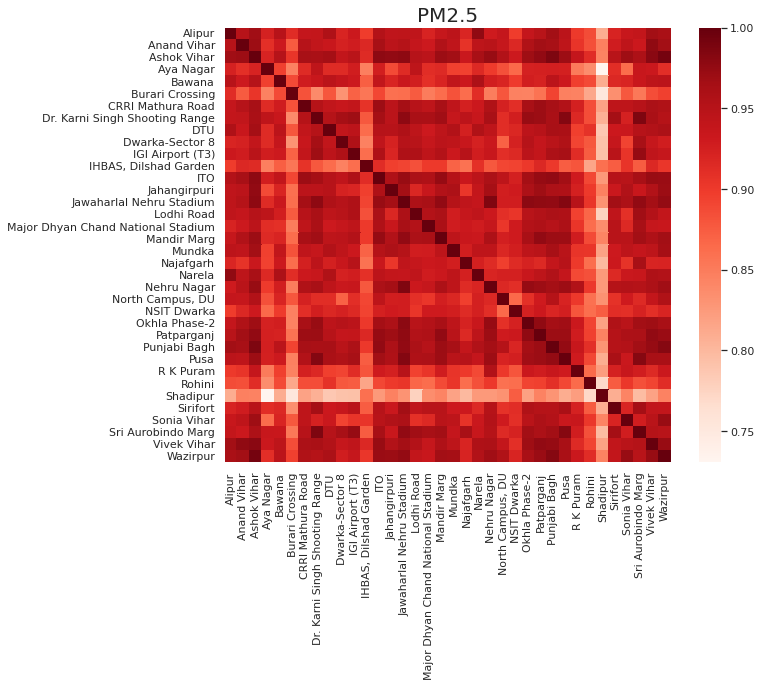

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
plt.title('PM2.5', size=20)
sns.heatmap(cormat, cmap='Reds')

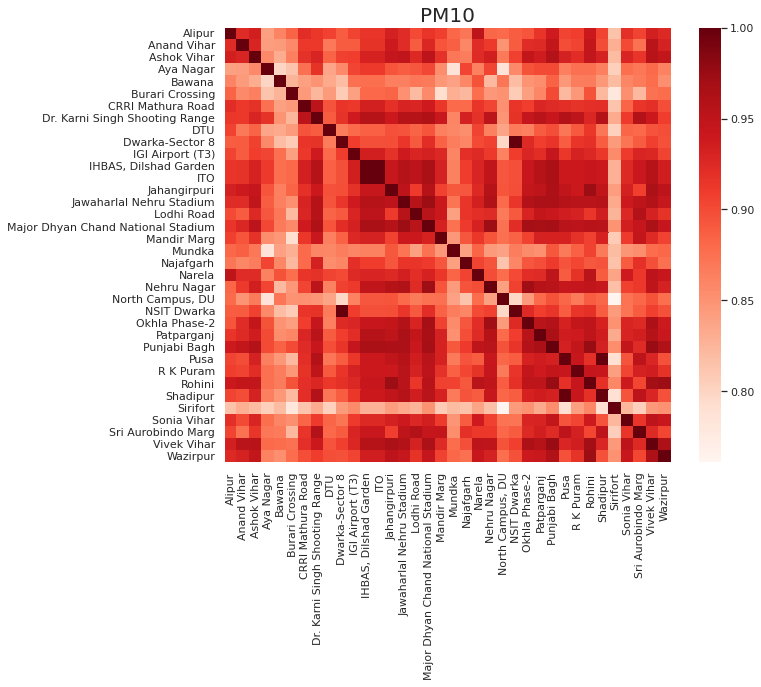

In [ ]:
cormat = pm10_df.corr()
round(cormat,2)
sns.set(rc = {'figure.figsize':(10,8)})
plt.title('PM10', size=20)
sns.heatmap(cormat, cmap='Reds')

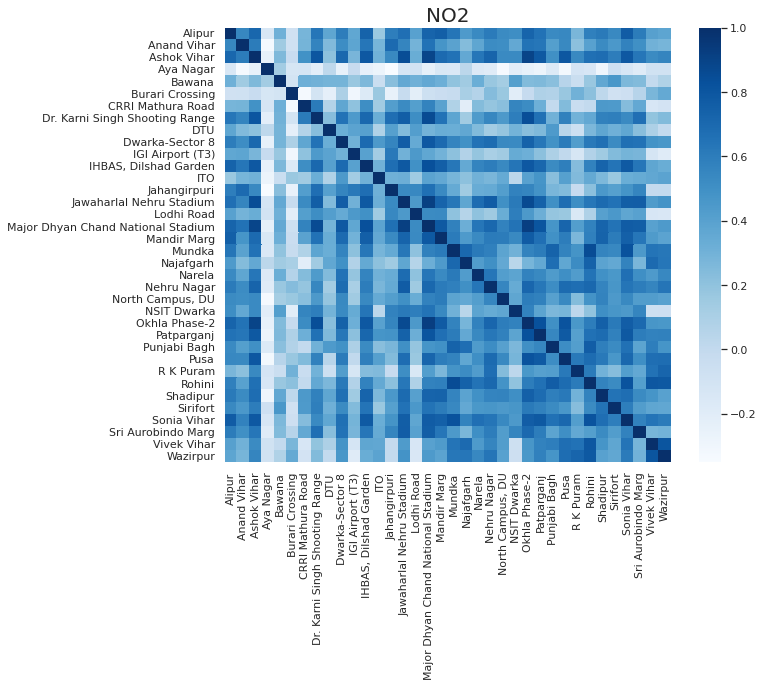

In [ ]:
cormat = no2_df.corr()
round(cormat,2)
sns.set(rc = {'figure.figsize':(10,8)})
plt.title('NO2', size=20)
sns.heatmap(cormat, cmap='Blues')

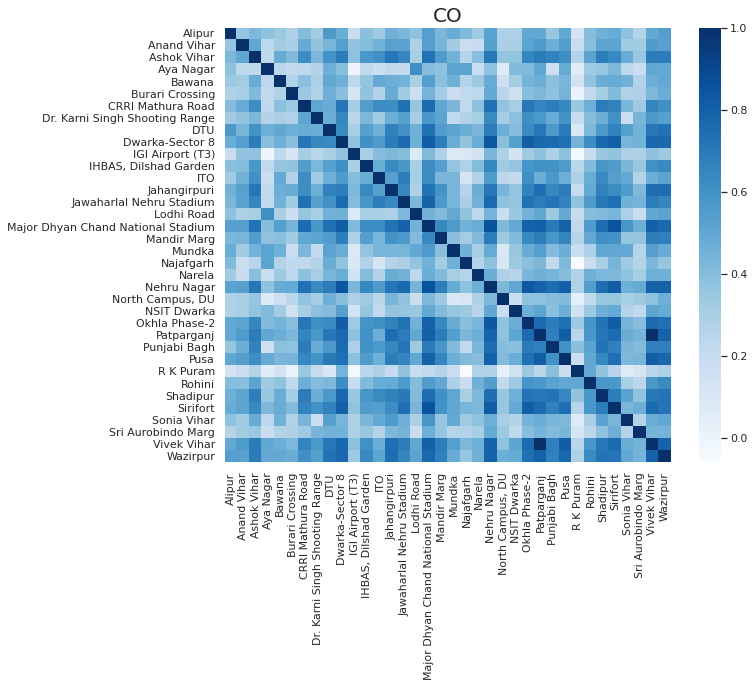

In [ ]:
cormat = co_df.corr()
round(cormat,2)
sns.set(rc = {'figure.figsize':(10,8)})
plt.title('CO', size=20)
sns.heatmap(cormat, cmap='Blues')

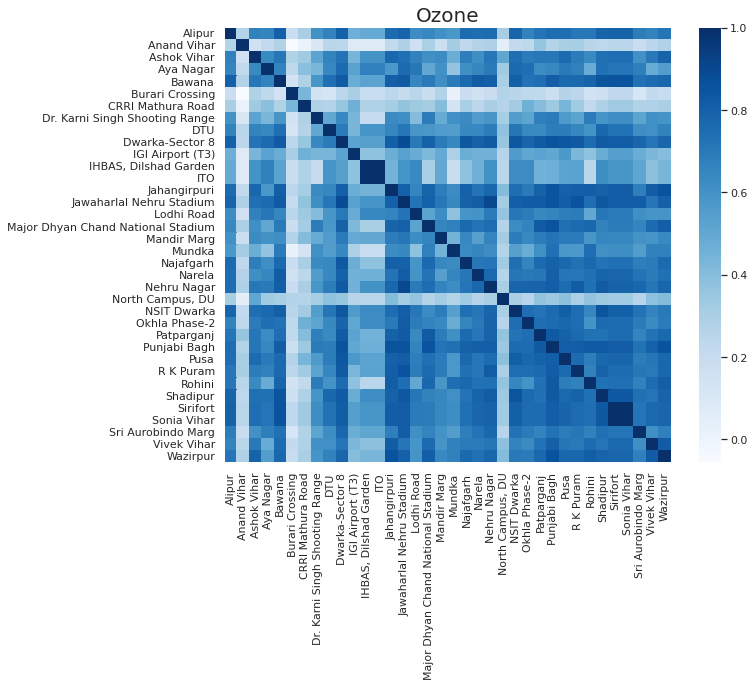

In [ ]:
cormat = ozone_df.corr()
round(cormat,2)
sns.set(rc = {'figure.figsize':(10,8)})
plt.title('Ozone', size=20)
sns.heatmap(cormat, cmap='Blues')